<a href="https://colab.research.google.com/github/ys23-lys/ESAA/blob/main/ESAA_YB_WEEK4_%ED%95%84%EC%82%AC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [내용 정리]

## 데이터 전처리

## 데이터 인코딩

### 레이블 인코딩

레이블 인코딩(Label encoding): 카테고리 피처(문자열 값)를 코드형 숫자 값으로 변환하는 것.
- **LabelEncoder** 클래스로 구현; fit()과 transform()을 호출해 수행.
- classes_: 인코딩 클래스 확인.
- inverse_transform(): 인코딩된 값을 다시 디코딩.

### 원-핫 인코딩

원-핫 인코딩(One Hot encoding): 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식.
- **OneHotEncoder** 클래스로 변환 가능.
- 희소행렬 형태이므로 toarray() 메서드를 이용해 밀집 행렬로 변환해야 함.
- **get_dummies()**: 숫자형 값으로 변환 없이도 바로 변환이 가능함.

## 피처 스케일링과 정규화
표준화(Standardization), 정규화(Normalization)

### StandardScaler
개별 피처를 평균이 0, 분산이 1인 값으로 변환.(가우시안 정규 분포를 가지게 함.)
- fit(), transform() 메서드에 변환 대상 피처 데이터 세트를 입력 후 호출.

### MinMaxScaler

데이터값을 0 ~ 1 사이의 범위 값으로 변환.
- 음수 값일 시 -1 ~ 1

데이터 분포가 가우시안 부포가 아닐 경우에 적용.

### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

fit(): 데이터 변환을 위한 기준 정보 설정.

transform(): 설정된 정보를 이용해 데이터 변환.

fit_transform(): fit(), transform()을 한 번에 적용.

* **Scaler 객체를 이용할 때,** 학습 데이터로 fit(), transform()을 적용하면 테스트 데이터로는 이 결과를 이용해 transform() 변환을 적용해야 함.(**테스트 데이터에서도 fit()을 사용해서는 안 됨.**: 새로운 스케일링 기준 정보를 만드는 것.)

1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리.
2. 1이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환.

## 사이킷런으로 수행하는 타이타닉 생존자 예측

<전처리>

사이킷런 머신러닝 알고리즘은 NULL값을 허용하지 않음. -> DataFrame의 **fillna()** 함수 이용.(평균 또는 고정값으로 변경.)

Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요. -> **Cabin 속성의 앞 문자만 추출.**

<시각화 - 피처 살피기>

성별에 따른 생존 확률

부자와 가난한 사람 간의 생존 확률
- 객실 등급(Pclass)와 성별(Sex) 이용.

여성의 경우 일, 이등실에 따른 생존 확률 차이는 크지 않으나, 삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐.

남성의 경우 일등실의 생존 확률이 이, 삼등실의 생존 확률보다 월등히 높음.

나이에 따른 생존 확률
- 나이(Age)와 성별(Sex) 이용.

여자 Baby는 비교적 생존 확률 높음. 여자 Child는 다른 연령대에 비해 생존 확률 낮음. 여자 Elderly는 매우 생존 확률이 높음.

**Sex, Age, Pclass가 생존을 중요하게 좌우하는 피처임을 확인할 수 있음.**

<인코딩>

문자열 카테고리 피처를 숫자형 카테고리 피처로 변환. **- 레이블 인코딩 적용.**

데이터 전처리를 전체적으로 호출하는 함수 생성: **transform_features()**(Null 처리, 불필요한 피처 제거, 인코딩을 수행하는 내부 함수로 구성.)

PassengefId, Name, Ticket 피처 제거(단순한 식별자 수준의 피처)

<머신러닝>

결정 트리(DecisionTreeClassifier), 랜덤 포레스트(RandomForestClassifier), 로지스틱 회귀(LogisticRegression)를 이용해 타이타닉 생존자 예측.

<교차 검증>

교차 검증으로 결정 트리 모델을 평가.

model_selection 패키지의 KFold 클래스, cross_val_score()*-StratifiedKFold를 이용해 폴드 세트 분할-*, GridSearchCV 클래스 이용.

## 정리

**데이터 전처리 작업**: 데이터 클렌징 작업(오류 데이터 보정, 결손값 처리), 인코딩 작업(레이블 인코딩, 원-핫 인코딩), 데이터의 스케일링/정규화 작업

머신러닝 모델은 1. 학습 데이터로 학습한 뒤 별도의 테스트 데이터 세트로 평가되어야 함. 2. 테스트 데이터의 건수 부족이나 고정된 테스트 데이터 세트를 이용한 반복적인 모델 학습과 평가는 적합하지 않음. -> **교차 검증 수행**

**교차 검증**: KFold, StratifiedKFold, cross_val_score(), GridSearchCV 이용.

# [코드 필사]

## 데이터 전처리

## 데이터 인코딩

### 레이블 인코딩

레이블 인코딩(Label encoding): 카테고리 피처(문자열 값)를 코드형 숫자 값으로 변환하는 것.
- **LabelEncoder** 클래스로 구현; fit()과 transform()을 호출해 수행.
- classes_: 인코딩 클래스 확인.
- inverse_transform(): 인코딩된 값을 다시 디코딩.

### 원-핫 인코딩

원-핫 인코딩(One Hot encoding): 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식.
- **OneHotEncoder** 클래스로 변환 가능.
- 희소행렬 형태이므로 toarray() 메서드를 이용해 밀집 행렬로 변환해야 함.
- **get_dummies()**: 숫자형 값으로 변환 없이도 바로 변환이 가능함.

In [2]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [3]:
print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [4]:
print('디코딩 원본값:',encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [5]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 2차원 ndarray로 변환합니다.
items=np.array(items).reshape(-1,1)

# 원-핫 인코딩을 적용합니다.
oh_encoder=OneHotEncoder()
oh_encoder.fit(items)
oh_labels=oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환.
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [6]:
import pandas as pd

df=pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


## 피처 스케일링과 정규화
표준화(Standardization), 정규화(Normalization)

### StandardScaler
개별 피처를 평균이 0, 분산이 1인 값으로 변환.(가우시안 정규 분포를 가지게 함.)
- fit(), transform() 메서드에 변환 대상 피처 데이터 세트를 입력 후 호출.

### MinMaxScaler

데이터값을 0 ~ 1 사이의 범위 값으로 변환.
- 음수 값일 시 -1 ~ 1

데이터 분포가 가우시안 부포가 아닐 경우에 적용.

In [7]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환합니다.
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data,columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [8]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler=StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환.
iris_df_scaled=pd.DataFrame(data=iris_scaled,columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [9]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler=MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

# transformm() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled,columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

fit(): 데이터 변환을 위한 기준 정보 설정.

transform(): 설정된 정보를 이용해 데이터 변환.

fit_transform(): fit(), transform()을 한 번에 적용.

* **Scaler 객체를 이용할 때,** 학습 데이터로 fit(), transform()을 적용하면 테스트 데이터로는 이 결과를 이용해 transform() 변환을 적용해야 함.(**테스트 데이터에서도 fit()을 사용해서는 안 됨.**: 새로운 스케일링 기준 정보를 만드는 것.)

1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리.
2. 1이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환.



In [10]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array=np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)

In [11]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환.
scaler=MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10 -> 1로 변환됨.
train_scaled=scaler.transform(train_array)

print('원본 train_array 데이터:',np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:',np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [12]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨.
scaler.fit(test_array)

# 1/5 sclae로 test_array 데이터 변환함. 원본 5 -> 1로 변환.
test_scaled=scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:',np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:',np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [13]:
scaler=MinMaxScaler()
scaler.fit(train_array)
train_scaled=scaler.transform(train_array)
print('원본 train_array 데이터:',np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:',np.round(train_scaled.reshape(-1),2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함.
test_scaled=scaler.transform(test_array)
print('\n원본 test_array 데이터:',np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:',np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


## 사이킷런으로 수행하는 타이타닉 생존자 예측

In [14]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
titanic_df=pd.read_csv('/content/drive/My Drive/Colab/ESAA/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [17]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


사이킷런 머신러닝 알고리즘은 NULL값을 허용하지 않음. -> DataFrame의 **fillna()** 함수 이용.(평균 또는 고정값으로 변경.)

In [18]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 개수',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


/tmp/ipython-input-4091264719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
/tmp/ipython-input-4091264719.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [19]:
print('Sex 값 분포:\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n',titanic_df['Embarked'].value_counts())

Sex 값 분포:
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포:
 Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포:
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요. -> **Cabin 속성의 앞 문자만 추출.**

In [20]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


성별에 따른 생존 확률

In [21]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

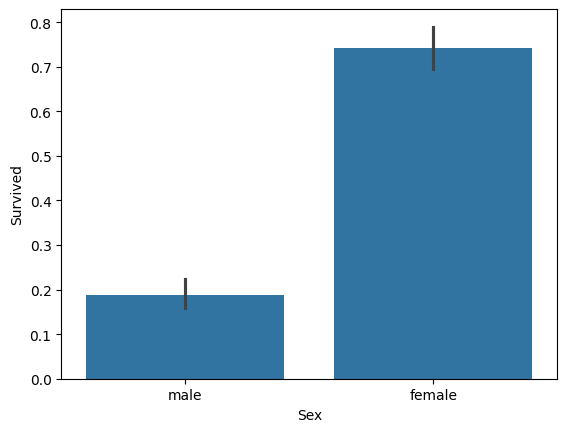

In [22]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

부자와 가난한 사람 간의 생존 확률
- 객실 등급(Pclass)와 성별(Sex) 이용.

여성의 경우 일, 이등실에 따른 생존 확률 차이는 크지 않으나, 삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐.

남성의 경우 일등실의 생존 확률이 이, 삼등실의 생존 확률보다 월등히 높음.

<Axes: xlabel='Pclass', ylabel='Survived'>

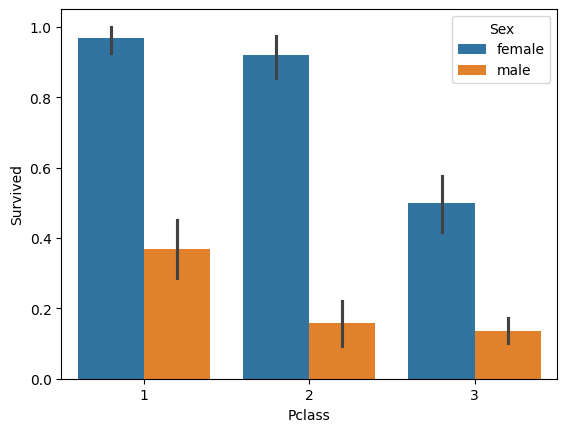

In [23]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

나이에 따른 생존 확률
- 나이(Age)와 성별(Sex) 이용.

여자 Baby는 비교적 생존 확률 높음. 여자 Child는 다른 연령대에 비해 생존 확률 낮음. 여자 Elderly는 매우 생존 확률이 높음.

**Sex, Age, Pclass가 생존을 중요하게 좌우하는 피처임을 확인할 수 있음.**

TypeError: DataFrame.drop() got an unexpected keyword argument 'inplacce'

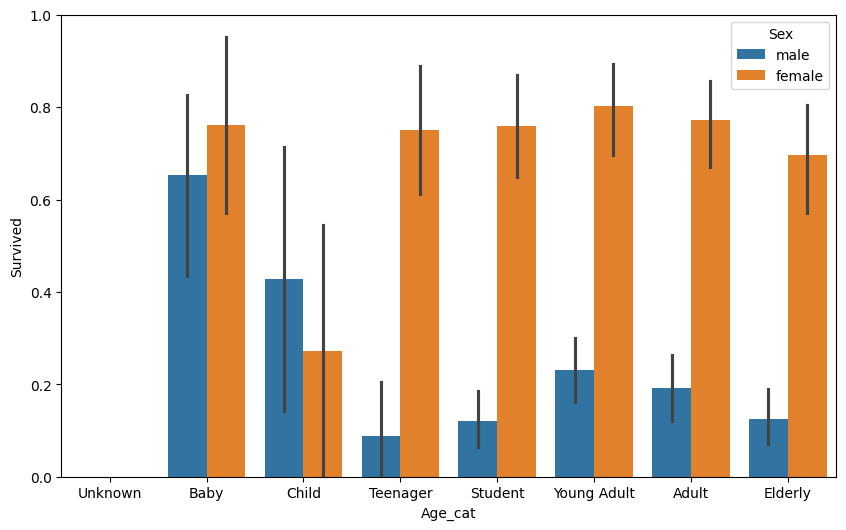

In [35]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식에 사용.
def get_category(age):
  cat=''
  if age<=-1: cat='Unknown'
  elif age<=5: cat='Baby'
  elif age<=12: cat='Child'
  elif age<=18: cat='Teenager'
  elif age<=25: cat='Student'
  elif age<=35: cat='Young Adult'
  elif age<=60: cat='Adult'
  else: cat='Elderly'

  return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# x축의 값을 순차적으로 표시하기 위한 설정
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정.
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환.
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_Cat',axis=1,inplacce=True)

문자열 카테고리 피처를 숫자형 카테고리 피처로 변환. **- 레이블 인코딩 적용.**



In [36]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF): # encode_features()라는 함수 생성해 한 번에 변환.
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=LabelEncoder()
    le=le.fit(dataDF[feature])
    dataDF[feature]=le.transform(dataDF[feature])

  return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2,Young Adult


데이터 전처리를 전체적으로 호출하는 함수 생성: **transform_features()**(Null 처리, 불필요한 피처 제거, 인코딩을 수행하는 내부 함수로 구성.)

PassengefId, Name, Ticket 피처 제거(단순한 식별자 수준의 피처)

In [37]:
# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0,inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df): # 불필요한 피처 제거 함수: drop_features(df)
  df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
  return df

# 레이블 인코딩 수행.
def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=LabelEncoder()
    le=le.fit(df[feature])
    df[feature]=le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수
def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

In [28]:
# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출.
titanic_df=pd.read_csv('/content/drive/My Drive/Colab/ESAA/train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)

X_titanic_df=transform_features(X_titanic_df)

/tmp/ipython-input-1309897803.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
/tmp/ipython-input-1309897803.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

결정 트리(DecisionTreeClassifier), 랜덤 포레스트(RandomForestClassifier), 로지스틱 회귀(LogisticRegression)를 이용해 타이타닉 생존자 예측.

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도:{0:4f}'.format(accuracy_score(y_test,dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:4f}'.format(accuracy_score(y_test,rf_pred)))

# LogisticRegressionn 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도:0.787709
RandomForestClassifier 정확도:0.854749
LogisticRegression 정확도:0.865922


교차 검증으로 결정 트리 모델을 평가.

model_selection 패키지의 KFold 클래스, cross_val_score()*-StratifiedKFold를 이용해 폴드 세트 분할-*, GridSearchCV 클래스 이용.

In [31]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
  # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
  kfold=KFold(n_splits=folds)
  scores=[]

  # KFold 교차 검증 수행.
  for iter_count, (train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index todtjd
    X_train,X_test=X_titanic_df.values[train_index],X_titanic_df.values[test_index]
    y_train,y_test=y_titanic_df.values[train_index],y_titanic_df.values[test_index]
    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train,y_train)
    predictions=clf.predict(X_test)
    accuracy=accuracy_score(y_test,predictions)
    scores.append(accuracy)
    print("교차 검증 {0} 정확도: {1:4f}".format(iter_count,accuracy))

  # 5개의 fold에서의 평균 정확도 계산.
  mean_score=np.mean(scores)
  print("평균 정확도:{0:4f}".format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도: 0.754190
교차 검증 1 정확도: 0.780899
교차 검증 2 정확도: 0.786517
교차 검증 3 정확도: 0.769663
교차 검증 4 정확도: 0.820225
평균 정확도:0.782299


In [32]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count,accuracy in enumerate(scores):
  print("교차 검증 {0} 정확도:{1:4f}".format(iter_count,accuracy))

print("평균 정확도:{0:4f}".format(np.mean(scores)))

교차 검증 0 정확도:0.743017
교차 검증 1 정확도:0.775281
교차 검증 2 정확도:0.792135
교차 검증 3 정확도:0.786517
교차 검증 4 정확도:0.842697
평균 정확도:0.787929


In [34]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10],
            'min_samples_split': [2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터:',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:{0:4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test,dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도:{0:4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.799183
테스트 세트에서의 DecisionTreeClassifier 정확도:0.871508


**데이터 전처리 작업**: 데이터 클렌징 작업(오류 데이터 보정, 결손값 처리), 인코딩 작업(레이블 인코딩, 원-핫 인코딩), 데이터의 스케일링/정규화 작업

머신러닝 모델은 1. 학습 데이터로 학습한 뒤 별도의 테스트 데이터 세트로 평가되어야 함. 2. 테스트 데이터의 건수 부족이나 고정된 테스트 데이터 세트를 이용한 반복적인 모델 학습과 평가는 적합하지 않음. -> **교차 검증 수행**

**교차 검증**: KFold, StratifiedKFold, cross_val_score(), GridSearchCV 이용.